In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from credentials import Credentials as cr
import matplotlib as plt
import os
from split import Splitter

splitter = Splitter()

## Création et import du jeu de données principal

In [39]:
valeurs2019 = pd.read_csv(cr.PATH+'2019.txt', sep='|', usecols=['Nature mutation', 'Code postal','Nombre pieces principales', 'Surface terrain', 'Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot', 'Valeur fonciere'])
valeurs2019.head()

valeurs2019.to_csv(cr.CURATED_LOCAL_PATH + 'filtered2019.csv', index=False)

## Split des natures de mutations pour n'utiliser que les ventes.

In [33]:
splitter.split_datas('filtered2019.csv', 'Nature mutation')

../data/CURATED/Vente.csv
../data/CURATED/Echange.csv
../data/CURATED/Vente terrain à bâtir.csv
../data/CURATED/Vente en l&#39;état futur d&#39;achèvement.csv
../data/CURATED/Adjudication.csv
../data/CURATED/Expropriation.csv


In [34]:
ventes = pd.read_csv(cr.CURATED_LOCAL_PATH + "Vente.csv")
ventes = ventes.drop(columns=['Unnamed: 0'])

# Vérification du ratio de valeurs nulles en vue de nettoyer les données.
nancount = ventes["Surface terrain"].isna()
print(nancount.sum(), ' valeurs nulles / ', ventes["Surface terrain"].count(), ' valeurs totales.')


610423  valeurs nulles /  1698116  valeurs totales.


In [9]:
ventes.head()

,Nature mutation,Valeur fonciere,Code postal,Surface Carrez du 1er lot,Surface Carrez du 2eme lot,Surface Carrez du 3eme lot,Surface Carrez du 4eme lot,Surface Carrez du 5eme lot,Nombre pieces principales,Surface terrain
0,Vente,"37220,00",1000.0,"19,27",NaN,NaN,NaN,NaN,1.0,NaN
1,Vente,"185100,00",1000.0,NaN,"61,51",NaN,NaN,NaN,3.0,NaN
2,Vente,"185100,00",1000.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,Vente,"209000,00",1160.0,NaN,NaN,NaN,NaN,NaN,4.0,940.0
4,Vente,"134900,00",1370.0,NaN,NaN,NaN,NaN,NaN,5.0,490.0


In [35]:
nancount = ventes["Valeur fonciere"].isna()
print ("Il y a ", nancount.sum(), " valeurs nulles dans la colonne \'Valeur Foncière\'.")
ventes = ventes.dropna(subset = ['Valeur fonciere'])

nancount = ventes["Valeur fonciere"].isna()
print ("Il y a ", nancount.sum(), " valeurs nulles dans la colonne \'Valeur Foncière\'.")

nancount = ventes["Code postal"].isna()
print ("Il y a ", nancount.sum(), " valeurs nulles dans la colonne \'Code postal\' sur un total de ", ventes["Surface terrain"].count(), "valeurs.")

ventes = ventes.dropna(subset = ['Code postal'])

nancount = ventes["Code postal"].isna()
print ("Il y a ", nancount.sum(), " valeurs nulles dans la colonne \'Code postal\' sur un total de ", ventes["Surface terrain"].count(), "valeurs.")

Il y a  27270  valeurs nulles dans la colonne &#39;Valeur Foncière&#39;.
Il y a  0  valeurs nulles dans la colonne &#39;Valeur Foncière&#39;.
Il y a  1059  valeurs nulles dans la colonne &#39;Code postal&#39; sur un total de  1671616 valeurs.
Il y a  0  valeurs nulles dans la colonne &#39;Code postal&#39; sur un total de  1671518 valeurs.


In [23]:
nancount = ventes["Nombre pieces principales"].isna()
print(nancount.sum())

958649


In [7]:
ventes.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 2280210 entries, 0 to 2308538
Data columns (total 10 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Nature mutation             object 
 1   Valeur fonciere             object 
 2   Code postal                 float64
 3   Surface Carrez du 1er lot   object 
 4   Surface Carrez du 2eme lot  object 
 5   Surface Carrez du 3eme lot  object 
 6   Surface Carrez du 4eme lot  object 
 7   Surface Carrez du 5eme lot  object 
 8   Nombre pieces principales   float64
 9   Surface terrain             float64
dtypes: float64(3), object(7)
memory usage: 191.4+ MB


In [39]:
ventes[['Valeur fonciere', 'Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot']] = ventes[['Valeur fonciere', 'Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot']].replace(',', '.', regex=True)

ventes[['Valeur fonciere', 'Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot']]  = ventes[['Valeur fonciere', 'Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot']].astype('float')

In [40]:
ventes.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 2280210 entries, 0 to 2308538
Data columns (total 10 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Nature mutation             object 
 1   Valeur fonciere             float64
 2   Code postal                 float64
 3   Surface Carrez du 1er lot   float64
 4   Surface Carrez du 2eme lot  float64
 5   Surface Carrez du 3eme lot  float64
 6   Surface Carrez du 4eme lot  float64
 7   Surface Carrez du 5eme lot  float64
 8   Nombre pieces principales   float64
 9   Surface terrain             float64
dtypes: float64(9), object(1)
memory usage: 191.4+ MB


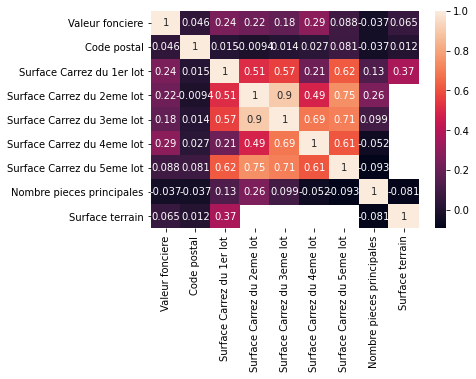

In [41]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = ventes.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()